<a href="https://colab.research.google.com/github/aria-fish/admission-stats-analysis/blob/main/Fisher_MLadmissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Project 1
###By: Aria Fisher

I have attempted to earn 25 out of the 25 possible points for this project. In an array of markdown cells, I have described the problem I am attempting to solve, my data preparation process, and my analysis of the experiment, as well as the challenges I encountered. In addition, my execution of the experiment has demonstrated the performance of each model (kNN, weighted kNN, Decision Tree, and Random Forest) on non-normalized data and normalized data. My experiment has also visualized the performance of each model over various parameter values and indicated the tuned parameter value which produces the best results.


##Problem
The problem I am trying to solve with this machine learning experiment is how to predict a student's probability of admission to a university, based on associated information about them. The dataset is from Kaggle, and it is made up of entries that describe students applying to a university. I am using the information from the dataset describing student application information as well as university information (i.e. GRE scores, University Rating, GPA, Research Experience) to predict the probability that they will be admitted to the university. As this is a regression problem, I will be using associated regression procedures for each model and assessing the performance of my models with the mean squared error and mean average error of their predictions.

In [ ]:
#Connecting to drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing Libraries and Data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn import neighbors
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

path = '/content/drive/MyDrive/Datasets/adm_data.csv'
data = pd.read_csv(path)
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


##Data Preparation
The process of preparing the data for my experiments consisted of checking for missing data and verifying that there was no missing data. This was done with the .isna().any() methods. I then checked that each attribute was providing numerical data, and noticed that the 'Serial No.' column was not relevant to the purpose of predicting admission probabilities, as it is just a column of row index labels. Thus, my last step in preparing my data for use was to create a subset without the 'Serial No.' column to be used for the rest of the project.

Having verified that there was no missing data, and that the values in the dataset were all numerical and relevant to the purpose of my experiment, I was satisfied with the condition of my data and found it to be ready for use.

In [ ]:
#Data Cleaning and Prep Code

# Remove missing data here
print(data.isna().any()) #This confirms there are no missing values
data=data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']]
## Because there's no data missing, and all columns are numerical and relevant now, the data is good to use.

# Creating the train/test split
target= 'Chance of Admit ' #note that there is a space at the end of this variable name
predictors = data.columns.drop(target)
train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
print('Data Shape:', data.shape)
print("Training Data Shape:", train_data.shape)
train_data.head()

# Normalizing the data
scaler = StandardScaler()
scaler.fit(train_data)
ntrain_data = scaler.transform(train_data)
ntest_data = scaler.transform(test_data)


Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool
Data Shape: (400, 8)
Training Data Shape: (320, 7)


Original MAE: 0.050359374999999984
Original MSE: 0.004365019531249998
Normalized MAE: 0.05015625
Normalized MSE: 0.0044646484375


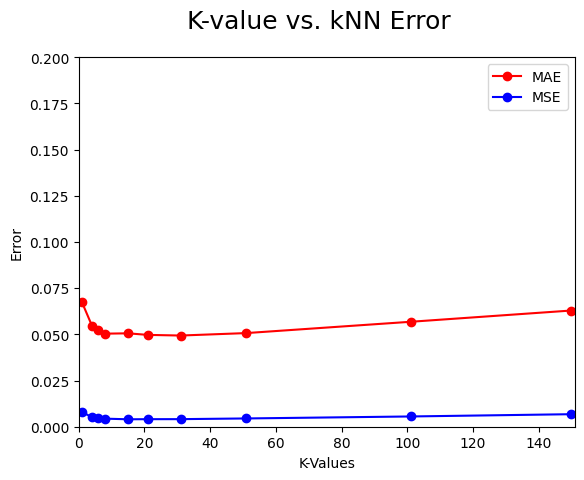

Tuned Minimum MAE: 0.04934274193548386
This minimum occurs at index 6 so it came from the parameter value 31


In [ ]:
# kNN Code

# Performance before tuning parameter- with original data

##1. Create regressor object
knn_regressor= neighbors.KNeighborsRegressor(n_neighbors = 8)
##2. Call fit
knn_regressor.fit(train_data, train_sln)
##3. Call predict to get predictions
knn_predictions= knn_regressor.predict(test_data)
#print('Num of Predictions: ', knn_predictions.shape) this verifies that the number of predictions aligns with the test set, as the test set has 400*.2 rows
##4. Call appropriate metric
print("Original MAE:", metrics.mean_absolute_error(test_sln, knn_predictions))
print("Original MSE:", metrics.mean_squared_error(test_sln, knn_predictions))

# Performance before tuning parameter- with normalized data

##1. Create regressor object
knn_regressor= neighbors.KNeighborsRegressor(n_neighbors = 8)
##2. Call fit
knn_regressor.fit(ntrain_data, train_sln)
##3. Call predict to get predictions
knn_predictions= knn_regressor.predict(ntest_data)
#print('Num of Predictions: ', knn_predictions.shape)
##4. Call appropriate metric
print("Normalized MAE:", metrics.mean_absolute_error(test_sln, knn_predictions))
print("Normalized MSE:", metrics.mean_squared_error(test_sln, knn_predictions))

# Tuning the k-value parameter
k_vals = [1,4,6,8,15,21,31,51,101,150]
mae_values = []
mse_values = []

def tune_k_value(list_of_k):
    for n in list_of_k:

        curr_knn = neighbors.KNeighborsRegressor(n_neighbors = n)
        curr_knn.fit(train_data,train_sln)
        curr_knn_predictions = curr_knn.predict(test_data)
        curr_mae = metrics.mean_absolute_error(test_sln,curr_knn_predictions)
        curr_mse = metrics.mean_squared_error(test_sln,curr_knn_predictions)
        mae_values.append(curr_mae)
        mse_values.append(curr_mse)

    plt.suptitle('K-value vs. kNN Error',fontsize=18)
    plt.xlabel('K-Values')
    plt.ylabel('Error')
    series1 = plt.plot(list_of_k,mae_values,'ro-', label= 'MAE')
    series2 = plt.plot(list_of_k, mse_values,'bo-', label= 'MSE')
    plt.axis([0,list_of_k[-1]+1,0,0.2])
    plt.legend()

    plt.show()

tune_k_value(k_vals)
min_mae= min(mae_values)
min_mae_index=mae_values.index(min_mae)
print('Tuned Minimum MAE:', min_mae)
print('This minimum occurs at index', min_mae_index, "so it came from the parameter value",k_vals[min_mae_index])

Original MAE: 0.048883696290117885
Original MSE: 0.004189722956976856
Normalized MAE: 0.04852908307947569
Normalized MSE: 0.004218963072890854


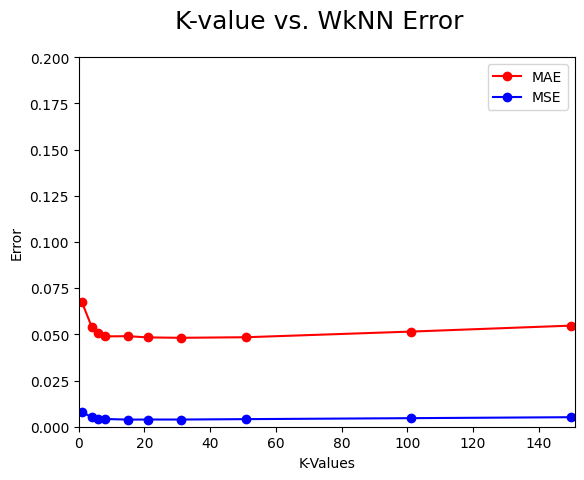

Tuned Minimum MAE: 0.04811534829219176
This minimum occurs at index 6 so it came from the parameter value 31


In [ ]:
# Weighted kNN code

# Performance before tuning parameter- with original data

##1. Create regressor object
wknn_regressor= neighbors.KNeighborsRegressor(n_neighbors = 8, weights = 'distance')
##2. Call fit
wknn_regressor.fit(train_data, train_sln)
##3. Call predict to get predictions
wknn_predictions= wknn_regressor.predict(test_data)
#print('Num of Predictions: ', wknn_predictions.shape)
##4. Call appropriate metric
print("Original MAE:", metrics.mean_absolute_error(test_sln, wknn_predictions))
print("Original MSE:", metrics.mean_squared_error(test_sln, wknn_predictions))

# Performance before tuning parameter- with normalized data

##1. Create regressor object
wknn_regressor= neighbors.KNeighborsRegressor(n_neighbors = 8, weights = 'distance')
##2. Call fit
wknn_regressor.fit(ntrain_data, train_sln)
##3. Call predict to get predictions
wknn_predictions= wknn_regressor.predict(ntest_data)
#print('Num of Predictions: ', wknn_predictions.shape)
##4. Call appropriate metric
print("Normalized MAE:", metrics.mean_absolute_error(test_sln, wknn_predictions))
print("Normalized MSE:", metrics.mean_squared_error(test_sln, wknn_predictions))

# Tuning the k-value parameter
k_vals = [1,4,6,8,15,21,31,51,101,150]
mae_values = []
mse_values = []
def tune_k_value(list_of_k):
    for n in list_of_k:

        curr_knn = neighbors.KNeighborsRegressor(n_neighbors = n, weights = 'distance')
        curr_knn.fit(train_data,train_sln)
        curr_knn_predictions = curr_knn.predict(test_data)
        curr_mae = metrics.mean_absolute_error(test_sln,curr_knn_predictions)
        curr_mse = metrics.mean_squared_error(test_sln,curr_knn_predictions)
        mae_values.append(curr_mae)
        mse_values.append(curr_mse)

    plt.suptitle('K-value vs. WkNN Error',fontsize=18)
    plt.xlabel('K-Values')
    plt.ylabel('Error')
    series1 = plt.plot(list_of_k,mae_values,'ro-', label= 'MAE')
    series2 = plt.plot(list_of_k, mse_values,'bo-', label= 'MSE')
    plt.axis([0,list_of_k[-1]+1,0,0.2])
    plt.legend()

    plt.show()

tune_k_value(k_vals)
min_mae= min(mae_values)
min_mae_index=mae_values.index(min_mae)
print('Tuned Minimum MAE:', min_mae)
print('This minimum occurs at index', min_mae_index, "so it came from the parameter value",k_vals[min_mae_index])

Original MAE: 0.073875
Original MSE: 0.01023875
Normalized MAE: 0.074875
Normalized MSE: 0.01036875


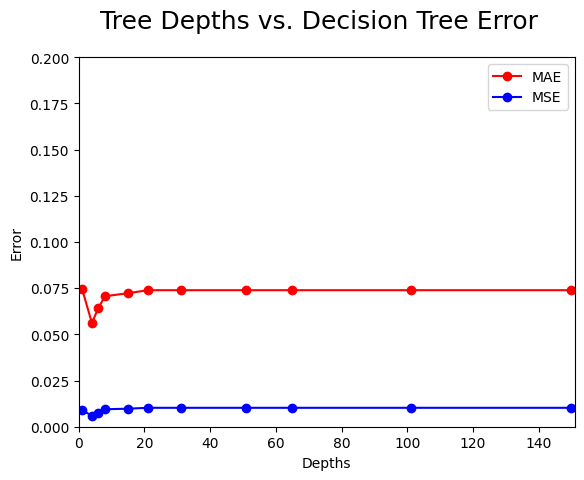

Tuned Minimum MAE: 0.056125
This minimum occurs at index 1 so it came from the parameter value 4


In [ ]:
# Decision Tree code

# Performance before tuning any parameter- original data

##1. Create regressor object
dt = tree.DecisionTreeRegressor(criterion = 'absolute_error', random_state=41)
##2. Call fit
dt.fit(train_data,train_sln)
##3. Call predict to get predictions
dt_predictions = dt.predict(test_data)
#print('Num of predictions: ', dt_predictions.shape)
##4. Call appropriate metric
print("Original MAE:", metrics.mean_absolute_error(test_sln, dt_predictions))
print("Original MSE:", metrics.mean_squared_error(test_sln, dt_predictions))

# Performance before tuning any parameter- normalized data

##1. Create regressor object
dt = tree.DecisionTreeRegressor(criterion = 'absolute_error', random_state=41)
##2. Call fit
dt.fit(ntrain_data,train_sln)
##3. Call predict to get predictions
dt_predictions = dt.predict(ntest_data)
#print('Num of predictions: ', dt_predictions.shape)
##4. Call appropriate metric
print("Normalized MAE:", metrics.mean_absolute_error(test_sln, dt_predictions))
print("Normalized MSE:", metrics.mean_squared_error(test_sln, dt_predictions))

# Tuning the tree depth parameter
depth_vals = [1,4,6,8,15,21,31,51,65,101, 150]
mae_values = []
mse_values = []

def tune_k_value(list_of_depths):
    for n in list_of_depths:

        curr_dt = tree.DecisionTreeRegressor(criterion = 'absolute_error', max_depth=n, random_state=41)
        curr_dt.fit(train_data,train_sln)
        dt_predictions = curr_dt.predict(test_data)
        curr_mae = metrics.mean_absolute_error(test_sln,dt_predictions)
        curr_mse = metrics.mean_squared_error(test_sln,dt_predictions)
        mae_values.append(curr_mae)
        mse_values.append(curr_mse)

    plt.suptitle('Tree Depths vs. Decision Tree Error',fontsize=18)
    plt.xlabel('Depths')
    plt.ylabel('Error')
    series1 = plt.plot(list_of_depths,mae_values,'ro-', label= 'MAE')
    series2 = plt.plot(list_of_depths, mse_values,'bo-', label= 'MSE')
    plt.axis([0,list_of_depths[-1]+1,0,0.2])
    plt.legend()

    plt.show()

tune_k_value(depth_vals)
min_mae= min(mae_values)
min_mae_index=mae_values.index(min_mae)
print('Tuned Minimum MAE:', min_mae)
print('This minimum occurs at index', min_mae_index, "so it came from the parameter value",depth_vals[min_mae_index])

Original MAE:  0.05351875000000002
Original MSE: 0.005132695874999997
Normalized MAE:  0.053021250000000006
Normalized MSE: 0.005047422374999995


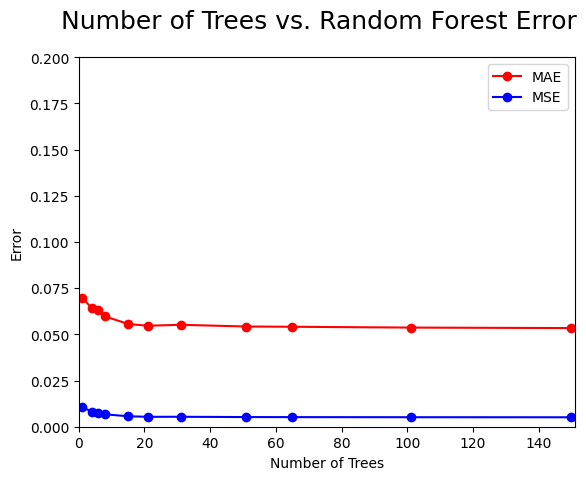

Tuned Minimum MAE: 0.053380000000000094
This minimum occurs at index 10 so it came from the parameter value 150


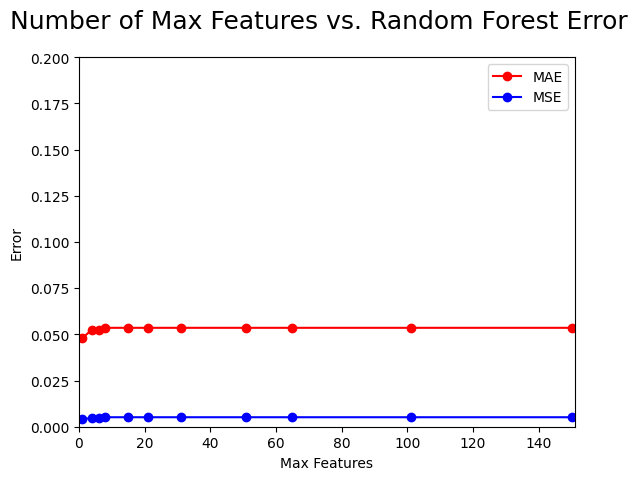

Tuned Minimum MAE: 0.04787624999999998
This minimum occurs at index 0 so it came from the parameter value 1


In [ ]:
# Random Forest code

# Performance before tuning any parameters- original data

##1. Create regressor object
forest = RandomForestRegressor(random_state = 41)
##2. Call fit
forest.fit(train_data,train_sln)
##3. Call predict to get predictions
f_predictions = forest.predict(test_data)
#print('Num of Predictions: ', f_predictions.shape)
##4. Call appropriate metric
print("Original MAE: ", metrics.mean_absolute_error(test_sln,f_predictions))
print("Original MSE:", metrics.mean_squared_error(test_sln, f_predictions))

# Performance before tuning any parameters- normalized data

##1. Create regressor object
forest = RandomForestRegressor(random_state = 41)
##2. Call fit
forest.fit(ntrain_data,train_sln)
##3. Call predict to get predictions
f_predictions = forest.predict(ntest_data)
#print('Num of Predictions: ', f_predictions.shape)
##4. Call appropriate metric
print("Normalized MAE: ", metrics.mean_absolute_error(test_sln,f_predictions))
print("Normalized MSE:", metrics.mean_squared_error(test_sln, f_predictions))

# Tuning the number of trees parameter
tree_vals = [1,4,6,8,15,21,31,51,65,101, 150]
rf_mae = []
rf_mse = []

def tune_number_of_trees(n_estimator_values):
    for n in n_estimator_values:

        curr_rf = RandomForestRegressor(n_estimators=n, random_state=41)
        curr_rf.fit(train_data,train_sln)
        curr_predictions = curr_rf.predict(test_data)
        curr_mae = metrics.mean_absolute_error(test_sln,curr_predictions)
        curr_mse = metrics.mean_squared_error(test_sln,curr_predictions)
        rf_mae.append(curr_mae)
        rf_mse.append(curr_mse)

    plt.suptitle('Number of Trees vs. Random Forest Error',fontsize=18)
    plt.xlabel('Number of Trees')
    plt.ylabel('Error')
    series1 = plt.plot(tree_vals,rf_mae,'ro-', label= 'MAE')
    series2 = plt.plot(tree_vals, rf_mse,'bo-', label= 'MSE')
    plt.axis([0,tree_vals[-1]+1,0,0.2])
    plt.legend()

    plt.show()

# Tuning the maximum features parameter
frf_mae = []
frf_mse = []

def tune_max_features(max_features_values):
    for m in max_features_values:

        curr_rf = RandomForestRegressor(max_features=m, random_state=41)
        curr_rf.fit(train_data,train_sln)
        curr_predictions = curr_rf.predict(test_data)
        curr_mae = metrics.mean_absolute_error(test_sln,curr_predictions)
        curr_mse = metrics.mean_squared_error(test_sln, curr_predictions)
        frf_mae.append(curr_mae)
        frf_mse.append(curr_mse)

    plt.suptitle('Number of Max Features vs. Random Forest Error',fontsize=18)
    plt.xlabel('Max Features')
    plt.ylabel('Error')
    series1 = plt.plot(max_features_values,frf_mae,'ro-', label= 'MAE')
    series2 = plt.plot(max_features_values,frf_mse,'bo-', label= 'MSE')
    plt.axis([0,max_features_values[-1]+1,0,0.2])
    plt.legend()

    plt.show()

tune_number_of_trees(tree_vals)
min_mae= min(rf_mae)
min_mae_index=rf_mae.index(min_mae)
print('Tuned Minimum MAE:', min_mae)
print('This minimum occurs at index', min_mae_index, "so it came from the parameter value",tree_vals[min_mae_index])

tune_max_features(tree_vals)
min_mae= min(frf_mae)
min_mae_index=frf_mae.index(min_mae)
print('Tuned Minimum MAE:', min_mae)
print('This minimum occurs at index', min_mae_index, "so it came from the parameter value",tree_vals[min_mae_index])

##Analysis
In doing this research, I discovered that there are instances where normalizing your data will not necessarily result in an overall decrease in a model's average prediction error. I also discovered that very high parameter values should not be taken as synonymous with decreasing error in a model, as almost every graph in this experiment has demonstrated a rise in or leveling off of error metrics as a model's given parameter value has increased.

As a result of those discoveries I would recommend that for this data, parameters should generally be assigned values within a lower range, as the overall trend with each model shows an initial decrease in error towards the beginning of the graph, with the exception of the Random Forest's number of trees. I would also note that normalizing this specific dataset did not dramatically minimize the error for any of the models that I used- in a few cases it actually increased it. For example, the normalization results improved predictions with the kNN model but increased error for the Decision Tree model. This is because normalization is most helpful for models that operated based on distance between data points, so unless you are using a model that is distance-based, I would not recommend normalizing this dataset.

The model that worked best, as measured by the minimum overall MAE score after parameter tuning, was the Random Forest model with the default (100) number of trees and a maximum of 1 feature. It produced a MAE of 0.0479, in contrast with the highest post-tuning MAE of 0.0561 from the Decision Tree model with a depth of 4. Perhaps the Decision Tree did not perform as well as the others because each feature of the data was equally important in predicting a student's chance of admission, and the hierachical format of a singular tree works best when there are features that it can prioritize over others to organize parent and child nodes in the most effective way. In contrast, the Random Forest model's use of ensemble learning does not depend on having certain features prioritized over others, and thus it was able to perform better.

One element of my analysis that I wanted to make note of was my decision to use MAE as the primary measure of a model's success, this is simply because the MSE results for each model were essentially the same as those for MAE, but at an overall lower error level with less dramatic variance between points. Thus, I chose the MAE results because the overall trend of the results is essentially the same as it is for MSE, but the variation between parameter values is easier to visually identify.

Overall, given the results of this experiment, it seems that using a random forest data model with a high number of trees and low number of features would generally be the best way to predict a student's probability of admission to a university based on the attributes included in this dataset.

##Challenges
The main struggle I encountered while doing this research were navigating the data normalization with StandardScalar, as the unexpected result of having normalized data return a similar average error to the original data led me to some confusion about how exactly StandardScalar operates and the form of the data that it outputs. Another challenge was attempting to create a satisfactory spread of parameter values for my data visualizations, as I needed to work at a small enough scale to visibly demonstrate the effect of each parameter value on the error, but I also did not want to misrepresent the overall behavior of the model by only showing the lower values where there was more dramatic fluctuation.
To tackle these challenges, I looked into the sklearn documentation for StandardScalar as well as over the class notes that incorporated it, and I tested many different sets of parameter values before settling on the ones I have now. I worked to specifically check the error outputs of the model with very large parameter values (250, 300, etc.) to make sure that the behavior visualized on the graph now is still representative of how the model's overall slope levels out, increases, or decreases as parameter values increase.